# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Missing values in Age, Cabin and Embarked 

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test = pd.read_csv('test.csv')
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
print(test.shape)

(418, 11)


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Survival Rates

In [12]:
survived_ship = train[train['Survived']==1]
did_not_survive = train[train['Survived']==0]
calculate = (len(survived_ship)/len(train))*100
calculate_inv = (len(did_not_survive)/len(train))*100
print("Survival Rate: %.2f" % calculate,"%" )
print("Did not Survive: %.2f"% calculate_inv,"%")

Survival Rate: 38.38 %
Did not Survive: 61.62 %


# Relationship between features and survival rates


1. pclass vs survival rate


In [13]:
train.Pclass.value_counts()
#Passenger per class

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
train.groupby('Pclass').Survived.value_counts()
#Survival rate

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [15]:
train[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


/home/archit/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


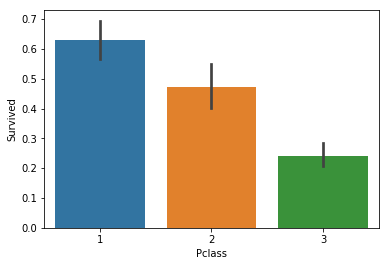

In [16]:
sns.barplot(x='Pclass',y='Survived',data=train)

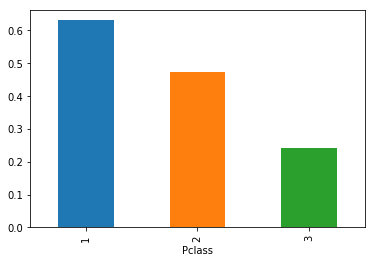

In [17]:
train.groupby('Pclass').Survived.mean().plot(kind='bar')

2. Sex vs Survival

In [18]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [20]:
train.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

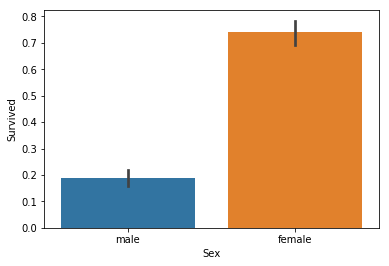

In [21]:
sns.barplot(x='Sex',y='Survived',data=train)
#Females had a better survival rate than men

3. Survival vs Sibsp

In [22]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

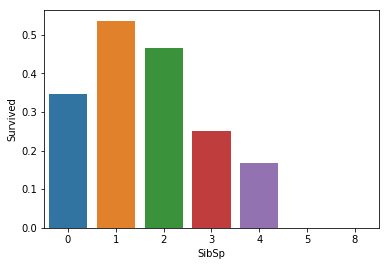

In [24]:
sns.barplot(x='SibSp',y='Survived',data=train,ci=None)

 4.Survival vs Parch

In [25]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [26]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [27]:
train.groupby('Parch',as_index=False).Survived.mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


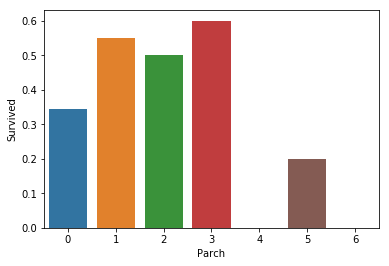

In [28]:
sns.barplot(x='Parch',y='Survived',data=train,ci=None)

5. Survival vs Embark

In [29]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
train[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()
#Survival rate corresponding to the embarking location

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


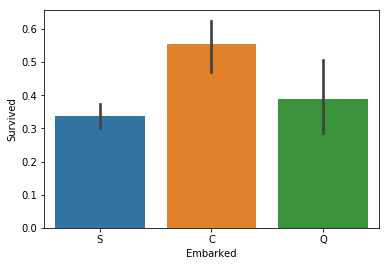

In [31]:
sns.barplot(x='Embarked',y='Survived',data=train,)

6. (Pclass,Sex) vs Survival Rates


Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347
(3, 2)


Text(0, 0.5, 'Percentage')

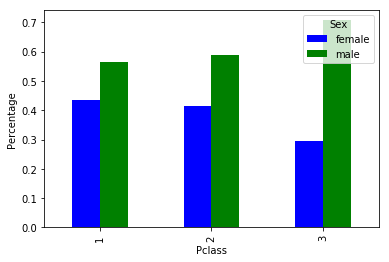

In [32]:
##using crosstab for groupby-which will give us the number of males and females in specific passenger class
ctb = pd.crosstab(train['Pclass'],train['Sex'])
print(ctb)
print(ctb.shape)
ctb.div(ctb.sum(1).astype(float),axis=0).plot(kind='bar',color=['b','g'])
plt.xlabel('Pclass')
plt.ylabel('Percentage')

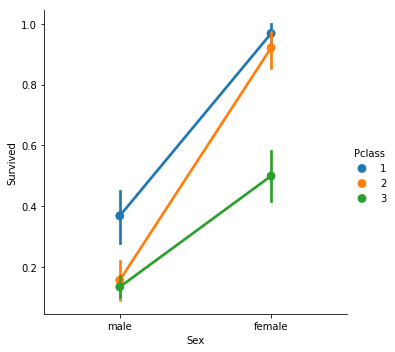

In [33]:
sns.catplot(x='Sex',y='Survived',hue='Pclass',data=train,kind='point')
# this graph represents that women surivial rate was more than men(least in Pclass 2 and 3 approx. 10%) 
# Also women surivival rate was most for Pclass 1 and least for Pclass3

7. Pclass,Sex,Embark vs Survival


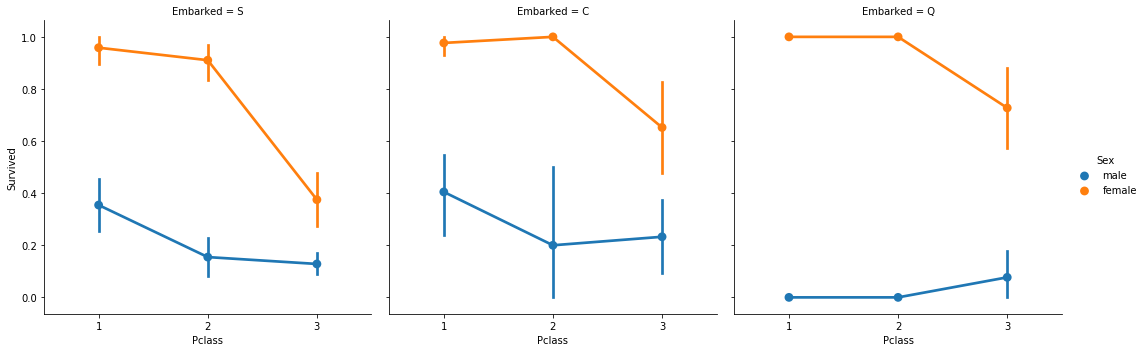

In [34]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=train,kind='point')

In [35]:
# Females in Pclass 1 have almost 100% survival rate from all three embarking points
# Females in Pclass 3 have the lower survival rates
# Men in Pclass 1 have little bit better survival rates from locations S and C.


8.Age vs Survival

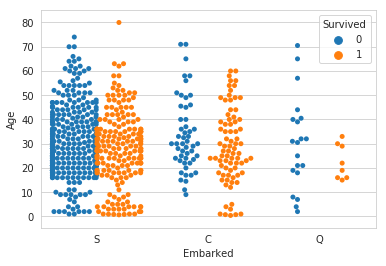

In [36]:
sns.set_style('whitegrid')
sns.swarmplot(x="Embarked", y="Age", hue="Survived", data=train, dodge=True)


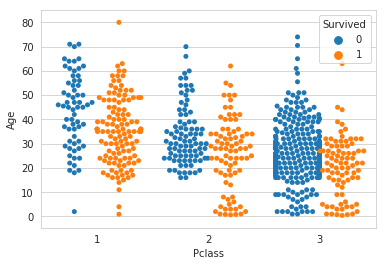

In [37]:
sns.set_style('whitegrid')
sns.swarmplot(x="Pclass", y="Age", hue="Survived", data=train, dodge=True)


1. In Pclass1 there are a few children also it has more elderly people
2. Pclass 2 children survived
3. Some children in Pclass 3 survived
4. More younger people survived in class 1 

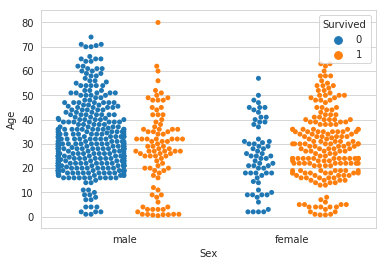

In [38]:
sns.swarmplot(x='Sex',y='Age',hue='Survived',data=train,dodge=True)

Heatmap for checking correlation

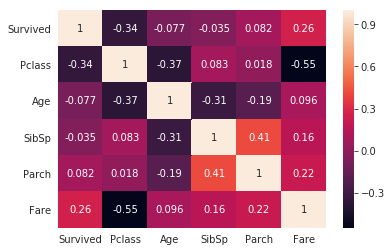

In [39]:
sns.heatmap(train.drop('PassengerId',axis=1).corr(),annot=True)

#the focus will be on features having Positive & Negative Corr. With Survival

# Feature Extraction

handling categorical datatype 

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
#combining data
combine_data = [train,test]


In [43]:
#Handling categorical data
for dataset in combine_data:
    dataset['Sex'] = dataset['Sex'].map({'female':0,'male':1}).astype(int)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
# handling Embarked data
for dataset in combine_data:
    dataset.Embarked = dataset.Embarked.fillna('S')

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [48]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
#handling categorical value

In [50]:
for dataset in combine_data:
    dataset.Embarked = dataset.Embarked.map({'S':0,'Q':1,'C':2}).astype(int)
    

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


In [52]:
for dataset in combine_data:
    dataset.Fare = dataset.Fare.fillna(train.Fare.median())

In [53]:
#Age feature
import sys

In [54]:
for dataset in combine_data:
    age_avg = dataset.Age.mean()
    age_std = dataset.Age.std()
    age_count = dataset.Age.isnull().sum()
    # will generate random ages for the range mean - std to mean+std
    age_gen = np.random.randint(age_avg-age_std,age_avg+age_std,size=age_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_gen
    dataset['Age'] = dataset['Age'].astype(int)
    
train['AgeBand'] = pd.cut(train['Age'],5)
print(train[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean())
# Passenger with an age band of 0 to 16 54.2% of survival rates

         AgeBand  Survived
0  (-0.08, 16.0]  0.513043
1   (16.0, 32.0]  0.357942
2   (32.0, 48.0]  0.369478
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


/home/archit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [55]:
for dataset in combine_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 1
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 4
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 5

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,C85,2,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,53.1000,C123,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]"


In [57]:
# fare feature

In [58]:
for dataset in combine_data:
    dataset['Fare'] = dataset.Fare.fillna(train.Fare.median())

In [59]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())
# people having higher fare band have a better survival rate

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,C85,2,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,53.1000,C123,0,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]","(7.91, 14.454]"


In [61]:
for dataset in combine_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,1,NaN,0,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,4,C85,2,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,2,NaN,0,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,4,C123,0,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,2,NaN,0,"(32.0, 48.0]","(7.91, 14.454]"


Feature Selection

In [63]:
drop_feature = ['Name','SibSp','Parch','Ticket','Cabin']
train = train.drop(drop_feature,axis=1)
test = test.drop(drop_feature,axis=1)
# removed same features in test and train


In [64]:
train = train.drop(['PassengerId','AgeBand','FareBand'],axis=1)

In [65]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,2,1,0
1,1,1,0,3,4,2
2,1,3,0,2,2,0
3,1,1,0,3,4,0
4,0,3,1,3,2,0


In [67]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,1,3,1,1
1,893,3,0,3,1,0
2,894,2,1,4,2,1
3,895,3,1,2,2,0
4,896,3,0,2,2,0


In [68]:
#dividing features into x and y
y_train = train['Survived']
X_train = train.drop('Survived',axis=1)
X_test = test.drop('PassengerId',axis=1)

In [69]:
X_train.shape

(891, 5)

In [70]:
y_train.shape

(891,)

In [71]:
X_test.shape

(418, 5)

Applying ML algos

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [73]:
#logistic regression
clas_lg = LogisticRegression()
clas_lg.fit(X_train,y_train)

/home/archit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
y_pred_lg=clas_lg.predict(X_test)

In [77]:
accuracy_lg = round(clas_lg.score(X_train,y_train)*100,2)
print(accuracy_lg)

79.01


In [85]:
#SVM
clas_svm = SVC()
clas_svm.fit(X_train,y_train)
y_pred_svm=clas_svm.predict(X_test)


/home/archit/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [81]:
accuracy_svm = round(clas_svm.score(X_train,y_train)*100,2)
print(accuracy_svm)

81.03


In [88]:
#KNN taking 7 neighbours
clas_knn = KNeighborsClassifier(n_neighbors = 7)
clas_knn.fit(X_train, y_train)
y_pred_knn = clas_knn.predict(X_test)
accuracy_knn = round(clas_knn.score(X_train, y_train) * 100, 2)
print (accuracy_knn)

82.83


In [95]:
#taking 6 neighbours
clas_knn = KNeighborsClassifier(n_neighbors = 6)
clas_knn.fit(X_train, y_train)
y_pred_knn = clas_knn.predict(X_test)
accuracy_knn = round(clas_knn.score(X_train, y_train) * 100, 2)
print (accuracy_knn)

82.72


In [97]:
#taking 5 neighbours
clas_knn = KNeighborsClassifier(n_neighbors = 5)
clas_knn.fit(X_train, y_train)
y_pred_knn = clas_knn.predict(X_test)
accuracy_knn = round(clas_knn.score(X_train, y_train) * 100, 2)
print (accuracy_knn)

81.93


In [99]:
#Decision Tree
clas_df = DecisionTreeClassifier()
clas_df.fit(X_train, y_train)
y_pred_df = clas_df.predict(X_test)
accuracy_df = round(clas_df.score(X_train, y_train) * 100, 2)
print (accuracy_df)

84.4


In [116]:
# random Forest
clf_rf = RandomForestClassifier(n_estimators=50)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print(y_pred_rf.shape)
print(X_test.shape)
acc_rf = round(clf_rf.score(X_train, y_train) * 100, 2)
print (acc_rf)


(418,)
(418, 5)
84.4


In [105]:
# getting same accuracy for DT and RF

In [106]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,1,3,1,1
1,893,3,0,3,1,0
2,894,2,1,4,2,1
3,895,3,1,2,2,0
4,896,3,0,2,2,0


In [130]:
submission_titanic=pd.DataFrame({"PassengerId":test['PassengerId'],"survived":y_pred_rf})
print(submission_titanic)
submission_titanic.to_csv('submission_titanic.csv',index=False)

     PassengerId  survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         1
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         1
29           921         1
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
3

References:
1.https://www.kaggle.com/startupsci/titanic-data-science-solutions
2.https://www.kaggle.com/startupsci/titanic-data-science-solutions
3.https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide/notebook
4.https://www.kaggle.com/omarelgabry/a-journey-through-titanic
